In [79]:

import csv
import datetime
import operator
import os
import re
from random import randint
import networkx as nx
import csv
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from operator import itemgetter
from shapely.wkt import loads
import copy
from os import path
import netwulf as nw
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mtick
from os import listdir
import time
import imageio

In [80]:
NOT_INFECTED=0
INFECTED=1
NUM_NODOS=1
PERCENTAGE = np.float64(0.60)
pathFile = "/Users/silviadelatorre/Desktop/TFG/PFG/Results/PROPAGACIÓN"

enlaces_global = "/Users/silviadelatorre/Desktop/TFG/EDGE LIST/3 COORDS/Edgelist_20240311_125307_GrafoGlobal.csv"
enlaces_duero = "/Users/silviadelatorre/Desktop/TFG/EDGE LIST/3 COORDS/Edgelist_20240311_125307_Grafo_RIO DUERO.csv"
enlaces_tajo = "/Users/silviadelatorre/Desktop/TFG/EDGE LIST/3 COORDS/Edgelist_20240311_125307_Grafo_RIO TAJO.csv"
enlaces_guadiana = "/Users/silviadelatorre/Desktop/TFG/EDGE LIST/3 COORDS/Edgelist_20240311_125307_Grafo_RIO GUADIANA.csv"
enlaces_jucar = "/Users/silviadelatorre/Desktop/TFG/EDGE LIST/3 COORDS/Edgelist_20240311_125307_Grafo_RIO JUCAR.csv"
enlaces_ebro = "/Users/silviadelatorre/Desktop/TFG/EDGE LIST/3 COORDS/Edgelist_20240311_125307_Grafo_RIO EBRO.csv"
enlaces_segura = "/Users/silviadelatorre/Desktop/TFG/EDGE LIST/3 COORDS/Edgelist_20240311_125307_Grafo_RIO SEGURA.csv"
enlaces_garona = "/Users/silviadelatorre/Desktop/TFG/EDGE LIST/3 COORDS/Edgelist_20240311_125307_Grafo_RIO GARONA.csv"
enlaces_barbate = "/Users/silviadelatorre/Desktop/TFG/EDGE LIST/3 COORDS/Edgelist_20240311_125307_Grafo_RIO BARBATE.csv"
enlaces_ter =  "/Users/silviadelatorre/Desktop/TFG/EDGE LIST/3 COORDS/Edgelist_20240311_125307_Grafo_RIU TER.csv"
enlaces_palancia = "/Users/silviadelatorre/Desktop/TFG/EDGE LIST/3 COORDS/Edgelist_20240311_125307_Grafo_RIU PALANCIA.csv"
enlaces_guadalquivir = "/Users/silviadelatorre/Desktop/TFG/EDGE LIST/3 COORDS/Edgelist_20240311_125307_Grafo_RIO GUADALQUIVIR.csv"
enlaces_miño = "/Users/silviadelatorre/Desktop/TFG/EDGE LIST/3 COORDS/Edgelist_20240311_125307_Grafo_RIO MIÑO.csv"
enlaces_llobregat = "Results/EDGE LISTS/Edgelist_20240311_125307_Grafo_RIU LLOBREGAT.csv"
rios = [(enlaces_palancia,"RIO PALANCIA"),(enlaces_duero,"RIO DUERO"),(enlaces_garona,"RIO GARONA"),(enlaces_jucar,"RIO JUCAR"),(enlaces_ebro,"RIO EBRO"),(enlaces_miño,"RIO MIÑO"),(enlaces_ter,"RIO TER")]

rios_no_leen_padre = [(enlaces_guadiana,"RIO GUADIANA"),(enlaces_tajo,"RIO TAJO"),(enlaces_segura,"RIO SEGURA"),(enlaces_llobregat,"RIO LLOBREGAT"),(enlaces_barbate,"RIO BARBATE"),(enlaces_guadalquivir,"RIO GUADALQUIVIR")]

fosfato = "Results/VALORES CONTAMINACION/Fosfato_merged.csv"
amonio = "Results/VALORES CONTAMINACION/Amonio_merged.csv"
fosforo = "Results/VALORES CONTAMINACION/Fosforo_merged.csv"
fitobentos = "Results/VALORES CONTAMINACION/Fitobentos_merged.csv"
nitrato = "Results/VALORES CONTAMINACION/Nitrato_merged.csv"
grado_trofico = "Results/VALORES CONTAMINACION/Grado Trofico_merged.csv"


In [120]:
def GraficarRed(G,nombre):
    print("Graficando red")
    plt.figure(figsize=(30, 30))
    plt.title(nombre,fontsize=36, fontweight='bold', color='black', fontname='Helvetica')
    #grado de cada nodo
    degrees = dict(G.degree())
    #nodos
    nodes = G.nodes()
    n_color = np.asarray([degrees[n] for n in nodes])
    #grafica usando un layout apropiado para representar la jerarquia de la red 
    pos = nx.spring_layout(G,k=0.5)
    nx.draw(G, pos=pos ,with_labels=False, node_size=100, font_size=8, font_color='black', font_weight='bold', node_color=n_color, edge_color='black', width=0.5, style='solid', alpha=0.5, node_shape='o', connectionstyle='arc3,rad=0.1', arrowsize=10, arrowstyle='-|>', arrows=True, label='G')
    directorio_graficos = "/Users/silviadelatorre/Desktop/TFG/PFG/Results/GRAFICOS REDES/3 COORDS-kamada/"
    if not os.path.exists(directorio_graficos):
        os.makedirs(directorio_graficos)
    file_path = os.path.join(directorio_graficos, f'{nombre}.png')
    plt.savefig(file_path)
    plt.show()

In [109]:

def CrearGrafo(edge_list,nombre):
    '''Creación del grafo a partir de la lista de enlaces'''
    global G
    G = nx.DiGraph()

    # Analizar el edge list y agregar los nodos y las aristas al grafo
    with open(edge_list, 'r') as f:
        for line in f:
            nodos_y_atributos = line.strip().split(';')
            nodo1_coords = tuple(map(float, nodos_y_atributos[0][1:-1].split(', ')))
            nodo2_coords = tuple(map(float, nodos_y_atributos[1][1:-1].split(', ')))

            # Agregar la arista al grafo
            G.add_edge(nodo2_coords, nodo1_coords)
            G.add_node(nodo1_coords)
            G.add_node(nodo2_coords)

    for node in G.nodes:
        if G.out_degree(node) == 0:  # Si el nodo no tiene aristas salientes
            print("Nodo padre (sin aristas salientes):", node)
            print(node)

    print("Número de nodos:", G.number_of_nodes())
    print("Número de aristas:", G.number_of_edges())
    degrees = G.degree()
    nodes = G.nodes()
    n_color = np.asarray([degrees[n] for n in nodes])
    GraficarRed(G,nombre)
    return G

In [83]:
def StatusNodes(V):
    'Inicializar dataframe de nodos y estados de infeccion'
    global df
    
    Nodes=V.nodes()
    #df = pd.DataFrame(Nodes)
    #print(df)
    data = {'Node': Nodes, 'Status': [NOT_INFECTED] * len(Nodes)}
    df = pd.DataFrame(data)
    #Exportar el data frame a un archivo csv
    #df.to_csv('Results/PROPAGACIÓN/StatusNodes.csv', index=False)
    #print(f'Status data frame: {df}')

In [84]:
def Infected_Nodes(V):
    '''Ratio infección'''
    global df

    #StatusNodes(V)
    TotalNodes = len(V.nodes())
    TotalNodesInfect = df['Status'].sum()

    Rate = TotalNodesInfect/TotalNodes*100
    print(f"Ratio infectados: {Rate:.4f}%")

    return Rate


In [85]:
def CodigodelRio(rio):
    '''Obtener el codigo de la desembocadura del rio'''
    if(rio=='RIO GUADALQUIVIR'):
        codigo = '10094'
    if(rio=='RIO GARONA'):
        codigo = '10034'
    if(rio=='RIO MIÑO'):
        codigo = '10038'
    if(rio=='RIO DUERO'):
        codigo = '1004'
    if(rio=='RIO TAJO'):
        codigo = '1006'
    if(rio=='RIO GUADIANA'):
        codigo = '1008'
    if(rio=='RIO BARBATE'):
        codigo = '10098'
    if(rio=='RIO TER'):
        codigo = '20054'
    if(rio=='RIO LLOBREGAT'):
        codigo = '20052'
    if(rio=='RIO PALANCIA'):
        codigo = '20036'
    if(rio=='RIO SEGURA'):
        codigo = '20016'
    if(rio=='RIO EBRO'):
        codigo='2004'
    if(rio=='RIO JUCAR'):
        codigo='2002'
    
    return codigo

In [86]:
import random

def ObtenerPrimerNodo(agente,rio):
    print(rio)
    print(agente)
    df = pd.read_csv(agente)
    # Filtrar primero las filas que comienzan con el código DEL RIO
    codigo = CodigodelRio(rio)
    df_filtrado = df[df['ID_RIO'].astype(str).apply(lambda x: x.startswith(str(codigo)))]
    print(f'Filas correspondientes al rio {df_filtrado}')
    max_valor = df_filtrado.iloc[:, 2].max()
    print(f'Mayor valor de contaminacion: {max_valor}')
    # Filtrar las filas correspondientes al rio que tengan el valor máximo de contaminación
    filas_max = df_filtrado[df_filtrado.iloc[:,2] == max_valor]
    print(f'Filas con el valor máximo de contaminación: {filas_max}')
    coordenadas_max = filas_max.iloc[:, 1].tolist()
    print(f'Coordenadas con el valor máximo de contaminación: {coordenadas_max}')
    coordenada_aleatoria = random.choice(coordenadas_max)
    print(f'Coordenada aleatoria: {coordenada_aleatoria}')

    return coordenada_aleatoria

In [87]:
def ObtenerID_Rio(agente,coordenada):
    '''Obtener el codigo del rio a partir de su coordenada'''
    coordenada_str = str(coordenada)
    df_agente = pd.read_csv(agente)
    row = df_agente[df_agente['coord_TRAMO'] == coordenada_str]
    if not row.empty:
        # Devolver el ID del río si se encuentra una coincidencia
        return row.iloc[0]['ID_RIO']
    else:
        # Si no se encuentra la coordenada, devolver None
        return None
            
                

In [88]:
# def dibujar_infeccion(G,agente,nombre_rio,iter):
#     # Establecer el color inicial de los nodos
#     global path
#     color_map = ['blue' if G.nodes[n]['Status'] == NOT_INFECTED else 'red' for n in G.nodes()]
    
#     plt.figure(figsize=(12, 8))
#     nx.draw(G, node_color=color_map, with_labels=True, node_size=50, font_size=8)
#     plt.title(f"Infección {agente} en el {nombre_rio}")
#     plt.show()
#     plt.savefig(f"{path}/Infeccion_{agente}_{nombre_rio}_iter{iter}.png")
#     plt.close()

In [89]:
def DibujarGrafica(Dir,rio,agente,pR):
    '''Grafica de los resultados'''

    # Leer los datos de la tabla
    tabla = os.path.join(Dir, f'{rio}3.csv')
    datosHeader = ["Iteracion","Tiempo Infección","Nodos infectados","Ratio infectados","Nodos Totales","pC","pR"]
    datos = pd.read_table(tabla, engine='python', delimiter=' ', header=0, encoding = "ISO-8859-1", names=datosHeader)

    valores_pR = [0.0, 0.1, 0.2, 0.3, 0.4]
    for pR in valores_pR:
        datos_pR = datos[datos['pR'] == pR]

        # Crear una nueva figura para cada valor de pR
        fig = plt.figure()

        # Iterar sobre cada valor de pC y graficar la línea correspondiente
        valores_pC = datos_pR['pC'].unique()
        for pC in valores_pC:
            datos_pC = datos_pR[datos_pR['pC'] == pC]
            plt.plot(datos_pC['Iteracion'], datos_pC['Ratio infectados'], label=f'pC={pC}')
        mi_path=os.path.join(Dir, f'{rio}3_{pR}.png')
        # Configurar la leyenda y los ejes
        plt.xlabel('Infection Time (Nº Iterations)')
        plt.ylabel('Infection rate (%)')
        plt.title(f'Spread of {agente} in {rio} with pR={pR}')
        plt.legend()
        
        fig.savefig(mi_path)
    plt.close(fig)

In [90]:
def DibujarGrafica2(Dir,rio,agente):
    '''Grafica de los resultados'''

    # Leer los datos de la tabla
    tabla = os.path.join(Dir, f'{rio}.csv')
    datosHeader = ["Iteracion","Tiempo Infección","Nodos infectados","Ratio infectados","Nodos Totales","pC","pR"]
    datos = pd.read_table(tabla, engine='python', delimiter=' ', header=0, encoding = "ISO-8859-1", names=datosHeader)

    valores_pR = [0.0, 0.1, 0.2, 0.3, 0.4]
    for pR in valores_pR:
        datos_pR = datos[datos['pR'] == pR]

        # Crear una nueva figura para cada valor de pR
        fig = plt.figure()

        # Iterar sobre cada valor de pC y graficar la línea correspondiente
        datos_agrupados = datos_pR.groupby('pC')['Tiempo Infección'].mean().reset_index()

        # Paso 3: Generar la Gráfica
        plt.plot(datos_agrupados['pC'], datos_agrupados['Tiempo Infección'], marker='o', linestyle='-')
        plt.title(f'Mar contaminado de {agente} dado la Probabilidad de Recuperación {pR} en {rio}')
        plt.xlabel('Probabilidad de Contagio (pC)')
        plt.ylabel('Tiempo de Infección Promedio')

        mi_path=os.path.join(Dir, f'pContagio_{rio}_{pR}.png')
    
        plt.legend()
        
        fig.savefig(mi_path)
    plt.close(fig)

In [91]:
def ComprobarInfeccion (N, p):
    
    if (np.random.binomial(N,p) > 0):
        print("INFECTION")
        return INFECTED
    else:
        print("NO INFECTION")
        return NOT_INFECTED

def ComprobarRecuperacion (p):
    
    if (np.random.binomial(1,p) > 0):
        return NOT_INFECTED
    else:
        return INFECTED

In [92]:
def VerificarInfeccionVecinos(V,i):

    global TotalNodes, pC

    Neighbours = list(V.successors(i))
    NumNodosInfect = df.Status[(df['Node'].isin(Neighbours)) & (df['Status'] == INFECTED)].sum()
    df.loc[df.Node == i, 'Status'] = ComprobarInfeccion(NumNodosInfect, pC)


def AplicarRecuperacion(i):

    global df, pR
	
    df.loc[df['Node'] == i, 'Status'] = ComprobarRecuperacion(pR)

In [93]:
def NodoPadre():
    '''Obtener la última coordenada de la desembocadura'''
    global G

    #Sacar las coordenadas del nodo que no tiene aristas salientes
    for nodo in G.nodes():
        if G.out_degree(nodo) == 0:
            print(f'Nodo padre: {nodo}')
            return nodo
    

In [94]:
def ListaNodosInfectados():
    global df

    InfectedNodes = df[df['Status'] == INFECTED]
    #print("Nodos infectados:", InfectedNodes)
    return InfectedNodes

def esta_infectado():
    '''Comprobar si la desembocadura está infectada'''
    global df 
    
    padre = NodoPadre()
    print("El nodo padre es", padre)
    #Si el estado del nodo padre es infectado, la desembocadura está infectada
    if df.loc[df['Node'] == padre, 'Status'].values[0] == INFECTED:
        print("La desembocadura está infectada")
        return True
    else:
        print("La desembocadura no está infectada")
        return False

In [95]:
def GuardarResultados(Rate,totalNodes,iter,path,rio,agente,time):
    '''Guardar resultados de la propagación en un csv'''
    global pathFile, pC, pR

    id_infectados = []
    for index, row in df[df['Status'] == INFECTED].iterrows():
        nodo_infectado = row['Node']
        id_rio = ObtenerID_Rio(agente, nodo_infectado)
        id_infectados.append(id_rio)
        
    datos = pd.DataFrame([[iter, time, id_infectados, Rate, totalNodes, pC, pR]], columns=['Iteracion', 'Tiempo Infección', 'Nodos infectados', 'Ratio infectados', 'Nodos Totales', 'pC', 'pR'])

    datos['Ratio infectados'] = datos['Ratio infectados'].apply(lambda x: f'{x:.4f}')

    csv_path = os.path.join(path, f'{rio}3.csv')
    if not os.path.exists(csv_path):
        # Si el archivo no existe, escribe la cabecera
        datos.to_csv(csv_path, header=True, index=None, mode='w', sep=' ', decimal='.')
    else:
        # Si el archivo ya existe, añade los nuevos datos sin la cabecera
        datos.to_csv(csv_path, header=False, index=None, mode='a', sep=' ', decimal='.')

    #Time += 1

In [96]:
def InfectarVecinos(V,iter,path,nombre_rio,codigo,agente):
    global Rate, TotalNodes, df, sucesores,Time

    #nodos_infectados = ListaNodosInfectados()
    # Propagar infección a los vecinos de los nodos infectados
    for index, row in df[df['Status'] == INFECTED].iterrows():
        nodo = row['Node']
        sucesores = list(V.successors(nodo))  # Obtener los sucesores del nodo infectado
        id_rio = ObtenerID_Rio(agente,nodo)
        #print(f'Infectando sucesores de {id_rio}-{nodo}')
        for sucesor in sucesores:
            antecesores = list(V.predecessors(sucesor))
            id_sucesor = ObtenerID_Rio(agente,sucesor)
            #print(f'Sucesor: {id_sucesor}-{sucesor}')
            # Verificar si el sucesor aún no está infectado y propagar la infección con una cierta probabilidad
            NumNodosInfect = df.Status[(df['Node'].isin(antecesores)) & (df['Status']==INFECTED)].sum()
            #num_susceptibles = len(sucesores)
            if df.loc[df['Node'] == sucesor, 'Status'].values[0] == NOT_INFECTED:
                #print("sucesor no está infectado")
                df.loc[df['Node'] == sucesor, 'Status'] = ComprobarInfeccion(NumNodosInfect,pC)
                end_time = time.time()  # Registra el tiempo de finalización
                execution_time = end_time - Time  # Calcula el tiempo de ejecución
            else:
                end_time = time.time()  # Registra el tiempo de finalización
                execution_time = end_time - Time  # Calcula el tiempo de ejecución

            if esta_infectado()==True:
                print("DESEMBOCADURA INFECTADA")
                GuardarResultados(Rate,TotalNodes,iter,path,nombre_rio,agente,execution_time)
                return Rate
            else:
                print("Aplicamos Recuperacion")
                [AplicarRecuperacion(i) for i in df[df['Status'] == INFECTED]['Node']]
                # Quiero salir de la funcion si df no tiene nodos infectados
                if df[df['Status'] == INFECTED].empty:
                    print("Todos los nodos se han recuperado No hay nodos infectados")
                    GuardarResultados(Rate,TotalNodes,iter,path,nombre_rio,agente,execution_time)
                    return Rate
    Rate = Infected_Nodes(V)
    GuardarResultados(Rate,TotalNodes,iter,path,nombre_rio,agente,execution_time)
    
    return Rate

In [97]:
def EjecutarIteracionInfeccion(V,Tipo,nombre,path):
    '''Función para ejecutar una iteración de la simulación'''
    
    global pathFile, Time, df, Rate, TotalNodes,NDir
    
    Iter=0
    Rate=0
    Time=time.time()
    #dibujar_infeccion(V,Tipo,nombre,Iter)
    print("Iteracion " + str(Iter))
    
    print("Propagando infeccion")

    Nodes=V.nodes()
    TotalNodes = len(Nodes)

    FirstNode = ObtenerPrimerNodo (Tipo,nombre)
    print("Primer nodo infectado")
    print(FirstNode)
    FirstNode = tuple(map(float, FirstNode.strip('()').split(', ')))
    print("Dataframe",df)

    # # Convertir FirstNode a una cadena en el mismo formato que las coordenadas en la columna Node
    # first_node_str = f"({FirstNode[0]}, {FirstNode[1]})"

    # # Buscar la coordenada en el DataFrame
    # mask = df['Node'] == first_node_str

    # # Verificar si la coordenada está en el DataFrame
    # if mask.any():
    #     # Cambiar el estado del nodo encontrado
    #     df.loc[mask, 'Status'] = INFECTED
    #     print("El estado del nodo se ha actualizado correctamente.")
    # else:
    #     print("La coordenada no se encontró en el DataFrame.")

    # # if not isinstance(FirstNode, tuple):
    # #     FirstNode = tuple(FirstNode)
    # print("FirstNode",first_node_str)
    # print(type(first_node_str))
    # #imprime el formato de los valores de la columna Node
    # print("Formato de la columna Node",df['Node'].dtype)
    
    # Busca la coordenada exacta en la columna 'Node' del DataFrame
    coordenada_presente = any(df['Node'] == FirstNode)

    # Verifica si la coordenada está presente en el DataFrame
    if coordenada_presente:
        print("La coordenada buscada está presente en el DataFrame")
    else:
        print("La coordenada buscada no está presente en el DataFrame")
        
    df.loc[df['Node'] == FirstNode, 'Status'] = INFECTED
    
    Rate = Infected_Nodes(V)
    GuardarResultados(Rate,TotalNodes,Iter,path,nombre,Tipo,Time)
    TotalNodesInfect = df.Status[df.Status==INFECTED].sum()
    print("Total nodos infectados:",TotalNodesInfect)
    
    codigo = CodigodelRio(nombre)
    print("Codigo del rio",codigo)

    while Rate < PERCENTAGE and esta_infectado() == False and ListaNodosInfectados().empty == False:
        #GuardarResultados(Rate,TotalNodes,Iter,path,nombre)
        print("Ratio menor que el 60% y desembocadura no infectada")
        Iter += 1
        Rate = InfectarVecinos(V,Iter,path,nombre,codigo,Tipo)
        
    print(f"Ratio FINAL nodos infectados: {Rate * 100:.4f}%")
    #print("End time "+str(execution_time))
    #DibujarGrafica(path,nombre,"Fosfato",pC, pR)

    

In [98]:
def CrearDirectorio(Tipo):
    print("Creando directorio")
    NDir= "/Users/silviadelatorre/Desktop/TFG/PFG/Results/PROPAGACIÓN/Prop"+Tipo
    os.makedirs(NDir, exist_ok=True)
    return NDir
    

In [99]:

def PropagarInfeccion2 (pR, pC, Tipo,V,rio):
    global path
    print("Ejecutando iteraciones")
    
    if (Tipo == 'Am'):
        path = CrearDirectorio('Amonio')
        EjecutarIteracionInfeccion(V,amonio,rio,path)
    elif (Tipo == 'Ni'):
        path = CrearDirectorio('Nitrato')
        EjecutarIteracionInfeccion(V,nitrato,rio,path)
    elif (Tipo == 'Fr'):
        path =  CrearDirectorio('Fosforo')
        EjecutarIteracionInfeccion(V,fosforo,rio,path)
    elif (Tipo == 'Ft'):
        path = CrearDirectorio('Fosfato')
        EjecutarIteracionInfeccion(V,fosfato,rio,path)
    elif (Tipo == 'Gt'):
        path = CrearDirectorio('GradoTrofico')
        EjecutarIteracionInfeccion(V,grado_trofico,rio,path)
    else:
        path = CrearDirectorio('Fitobentos')
        EjecutarIteracionInfeccion(V,fitobentos,rio,path)


In [100]:

def PropagarInfeccionTodasProbabilidades(i, j,Tipo,V,rio):
    global pC, pR
    
    pC=i
    pR=j
    print("Probabilidad contagio " + str(pC))
    print("Probabilidad recuperación " + str(pR))

    PropagarInfeccion2 (pR, pC, Tipo,V,rio)

In [101]:
def Menu2(graph,nombre_rio):
    global path

    while True:
        print("Choose an option:")
        print("1. Propagation with infection starting in node with highest nitrate contamination")
        print("2. Propagation with infection starting in node with highest phosphorus contamination")
        print("3. Propagation with infection starting in node with highest phosphate contamination")
        print("4. Propagation with infection starting in node with highest ammonium contamination")
        print("5. Propagation with infection starting in node with highest phytobenthos contamination")
        print("6. Propagation with infection starting in node with highest trophic grade contamination")
        print("7. Propagation with infection starting in node with highest overall contamination")
        print("8. Exit")
        
        option = input("")

        if option == "1":
            pR = 0
            while pR <= 0.5:
                pC = 1.0
                StatusNodes(graph)
                while pC > 0:
                    StatusNodes(graph)
                    PropagarInfeccionTodasProbabilidades(pC,pR,"Ni",graph,nombre_rio)
                    pC = round(pC - 0.1, 1)
                pR += 0.1
            #Graficar todas las probabilidades
            path = CrearDirectorio('Nitrato')
            DibujarGrafica(path,nombre_rio,"Nitrato",pR)
            #DibujarGrafica2(path,nombre_rio,"Nitrato")
            break

        elif option == "2":
            pR = 0
            while pR <= 0.5:
                pC = 1.0
                StatusNodes(graph)
                while pC > 0:
                    StatusNodes(graph)
                    PropagarInfeccionTodasProbabilidades(pC,pR,"Fr",graph,nombre_rio)
                    pC = round(pC - 0.1, 1)
                pR += 0.1
            #Graficar todas las probabilidades
            path = CrearDirectorio('Fosforo')
            DibujarGrafica(path,nombre_rio,"Fosforo",pR)
            break

        elif option == "3":
            pR = 0
            while pR <= 0.5:
                pC = 1.0
                StatusNodes(graph)
                while pC > 0:
                    StatusNodes(graph)
                    PropagarInfeccionTodasProbabilidades(pC,pR,"Ft",graph,nombre_rio)
                    pC = round(pC - 0.1, 1)
                pR += 0.1
            #Graficar todas las probabilidades
            path = CrearDirectorio('Fosfato')
            DibujarGrafica(path,nombre_rio,"Fosfato",pR)
            break

        elif option == "4":
            pR = 0
            while pR <= 0.5:
                pC = 1.0
                StatusNodes(graph)
                while pC > 0:
                    StatusNodes(graph)
                    PropagarInfeccionTodasProbabilidades(pC,pR,"Am",graph,nombre_rio)
                    pC = round(pC - 0.1, 1)
                pR += 0.1
            #Graficar todas las probabilidades
            path = CrearDirectorio('Amonio')
            DibujarGrafica(path,nombre_rio,"Amonio",pR)
            break

        elif option == "5":
            pR = 0
            while pR <= 0.5:
                pC = 1.0
                StatusNodes(graph)
                while pC > 0:
                    StatusNodes(graph)
                    PropagarInfeccionTodasProbabilidades(pC,pR,"Fb",graph,nombre_rio)
                    pC = round(pC - 0.1, 1)
                pR += 0.1
            #Graficar todas las probabilidades
            path = CrearDirectorio('Fitobentos')
            DibujarGrafica(path,nombre_rio,"Fitobentos",pR)
            break

        elif option == "6":
            pR = 0
            while pR <= 0.5:
                pC = 1.0
                StatusNodes(graph)
                while pC > 0:
                    StatusNodes(graph)
                    PropagarInfeccionTodasProbabilidades(pC,pR,"Gt",graph,nombre_rio)
                    pC = round(pC - 0.1, 1)
                pR += 0.1
                print("Probabilidad de contagio " + str(pC))
            #Graficar todas las probabilidades
            path = CrearDirectorio('GradoTrofico')
            DibujarGrafica(path,nombre_rio,"GradoTrofico",pR)
            #DibujarGrafica2(path,nombre_rio,"GradoTrofico")
            break
        elif option == "7":
            break
        else:
            print("Invalid option. Please choose again.")

    return option

In [106]:

def Menu1():
    while True:
        print("Choose an option:")
        print("1. Simulate propagation for the global network of rivers")
        print("2. Simulate propagation for each individual non-connected subnetwork")
        print("3. Exit")

        option = input("")
        print("You chose option: ",option)

        if option == "1":
            print("Simulating propagation for the entire network, infecting one node per subnetwork")
            G = CrearGrafo(enlaces_global)
            Menu2(G,"RIOS ESPAÑA")
            return option
        
        elif option == "2":
            print("Simulating propagation for each individual subnetwork")
            
            for enlaces,nombre_rio in rios:
                print(f"Propagar infección en rio {nombre_rio}")
                G = CrearGrafo(enlaces,nombre_rio)
                #Menu2(G,nombre_rio)
            return option
        elif option == "3":
            print("Exiting")
            return option
        else:
            print("Invalid option. Please choose again.")



In [103]:
#DibujarGrafica("/Users/silviadelatorre/Desktop/TFG/PFG/Results/PROPAGACIÓN/PropFosforo","RIO EBRO","Fosforo",0)

Choose an option:
1. Simulate propagation for the global network of rivers
2. Simulate propagation for each individual non-connected subnetwork
3. Exit
You chose option:  2
Simulating propagation for each individual subnetwork
Propagar infección en rio RIO PALANCIA
Nodo padre (sin aristas salientes): (688827.7187, 4422491.0462)
(688827.7187, 4422491.0462)
Número de nodos: 1065
Número de aristas: 1100
Graficando red


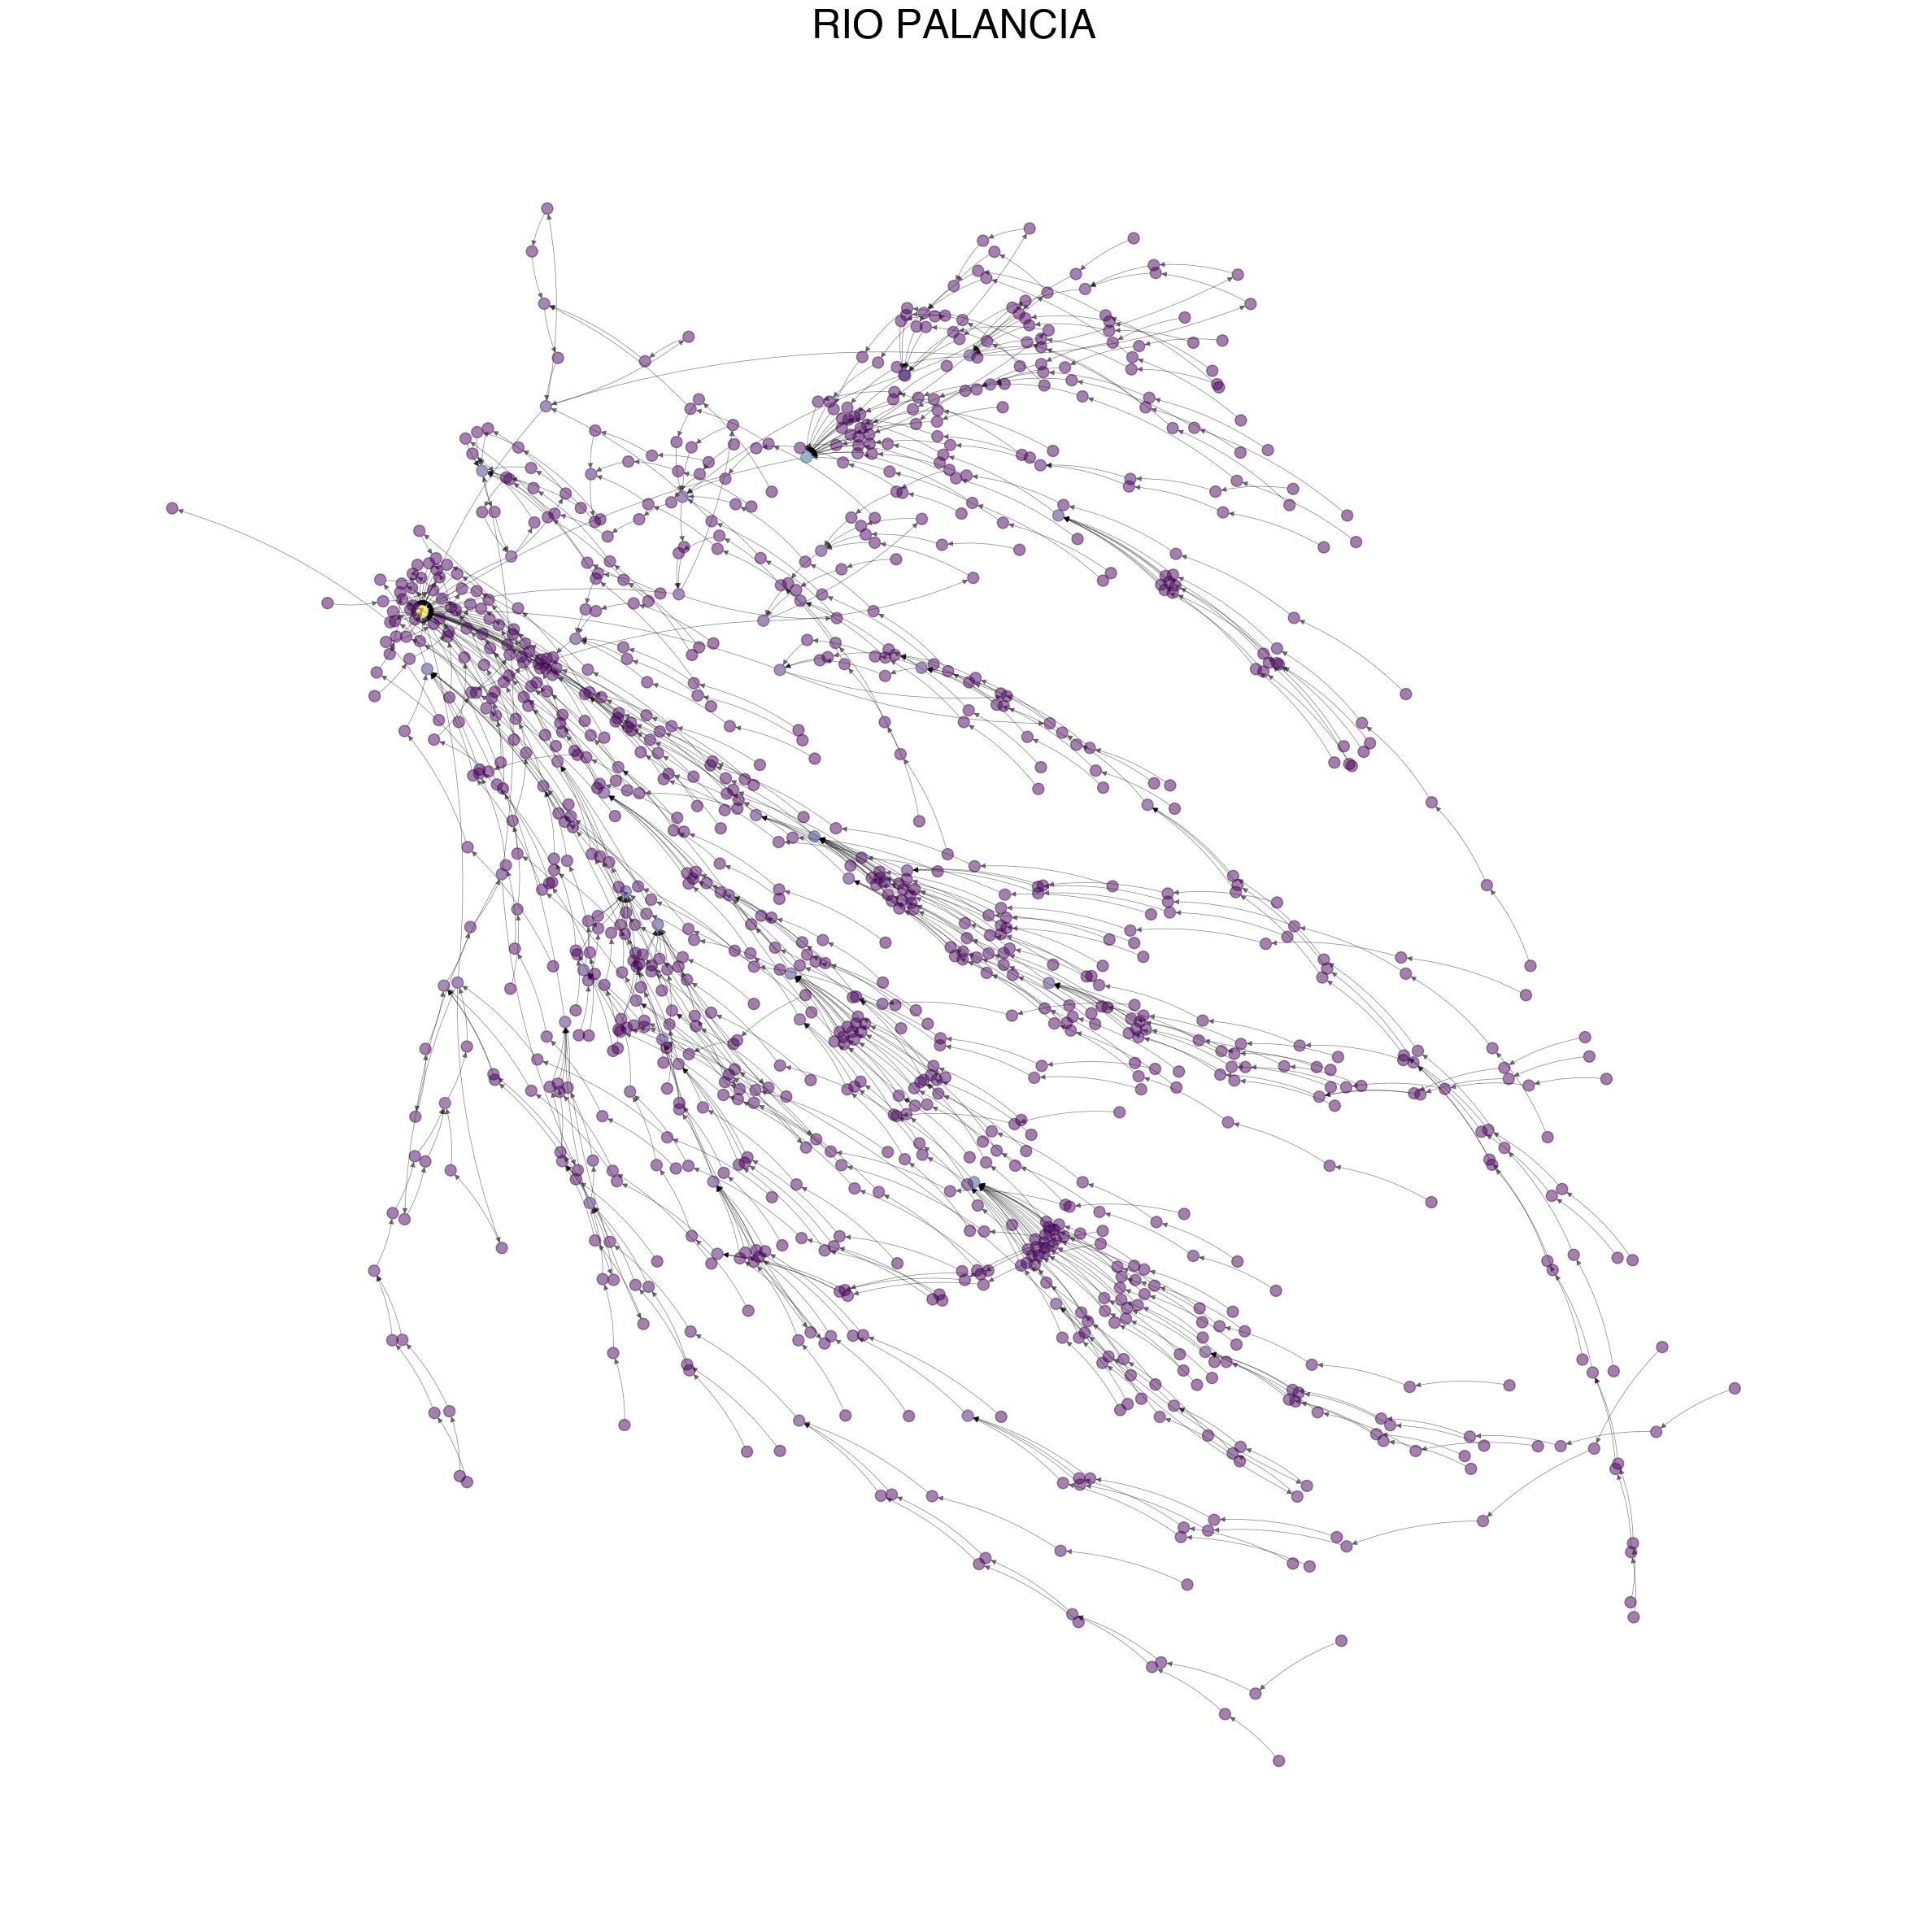

Propagar infección en rio RIO DUERO
Nodo padre (sin aristas salientes): (509966.8265, 4650592.0987)
(509966.8265, 4650592.0987)
Número de nodos: 66735
Número de aristas: 68402
Graficando red


In [121]:
option1 = Menu1()
